### I. Open exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import pprint
import numpy as np
from matplotlib.pyplot import cm

from specify import specify_levers

from __future__ import (unicode_literals, print_function, absolute_import,
                        division)
import time

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from ema_workbench import save_results
from ema_workbench import load_results
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

### 1. Define the problem and policies

Select a problem formualtion to explore here.

In [2]:
# Import case function

# # 3 objectives PF
# from problem_formulation import get_model_for_problem_formulation
# dike_model = get_model_for_problem_formulation(1)
# n_objectives = 3

# # 8 objectives PF
# from problem_formulation_new_version import get_model_for_problem_formulation
# dike_model = get_model_for_problem_formulation(4)
# n_objectives = 8

policy0 = Policy('policy_0', **specify_levers(0,0,0,0,0,0,0,0,0,0,0)) # DO NOTHING
policy1 = Policy('policy_1', **specify_levers(10,0,10,0,0,0,0,0,0,0,0)) # DO DIKES at A1, A3
policy2 = Policy('policy_2', **specify_levers(10,10,10,0,10,0,0,0,0,0,0)) # DO DIKES at A1, A2, A3, A5
policy3 = Policy('policy_3', **specify_levers(10,10,10,10,10,1,1,1,1,1,4)) # DO EVERYTHING
n_policies = 4

### 2. Run experiments

In [3]:
# n_scenarios = 10000
# start = time.time()
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results = evaluator.perform_experiments(n_scenarios, [policy0, policy1, policy2, policy3])
# end = time.time()
# print('Simulation time is ' + str(round((end - start)/60)) + ' mintues')

#### Save / load results

In [4]:
# file_name = 'open_exploration_' + str(n_scenarios) + 'k_' + str(n_policies) + 'pol_' + str(n_objectives) + 'obj' + '.tar.gz'
# save_results(results, file_name)
# results = load_results(file_name)

In [6]:
# 3 objectives PF
# results = load_results('open_exploration_10k_4pol_3obj.tar.gz')

# 8 oobjectives PF
results = load_results('open_exploration_10k_4pol_8obj.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Mikhail\Documents\Open exploration IJssel River case\Open exploration IJssel River case\open_exploration_10k_4pol_8obj.tar.gz


### 3. Analyze results statistically 

In [7]:
experiments, outcomes = results
n_scenarios = len(experiments) / n_policies

In [8]:
# Overall
pd.DataFrame(outcomes).describe()

,Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Gelderland Dike Investment Costs,OverIjsel Dike Investment Costs,GelderlandUpstream Expected Annual Damage,GelderlandDownstream Expected Annual Damage,OverIjsel Expected Annual Damage
count,40000.000000,4.000000e+04,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,0.232953,1.776000e+08,2.970466,1.138756e+08,2.078718e+07,1.143741e+08,5.481896e+07,4.009794e+07
std,0.416554,3.076161e+08,49.323626,7.330628e+07,2.078744e+07,2.650632e+08,1.402370e+08,7.179330e+07
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000286,0.000000e+00,0.000000,7.467223e+07,0.000000e+00,0.000000e+00,2.940871e+05,0.000000e+00
50%,0.025747,0.000000e+00,0.000000,1.351245e+08,2.078718e+07,1.313497e+06,6.884485e+06,4.490522e+06
75%,0.247221,1.776000e+08,0.000000,1.743279e+08,4.157436e+07,5.220290e+07,3.190093e+07,4.669935e+07
max,2.493580,7.104000e+08,2318.932601,1.852532e+08,4.157436e+07,1.505129e+09,8.703649e+08,5.122682e+08


In [9]:
# DO NOTHING policy
pd.DataFrame(outcomes).iloc[:int(n_scenarios),:].describe()

,Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Gelderland Dike Investment Costs,OverIjsel Dike Investment Costs,GelderlandUpstream Expected Annual Damage,GelderlandDownstream Expected Annual Damage,OverIjsel Expected Annual Damage
count,10000.000000,10000.0,10000.0,10000.0,10000.0,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.768771,0.0,0.0,0.0,0.0,3.964177e+08,1.918303e+08,8.002501e+07
std,0.531094,0.0,0.0,0.0,0.0,4.060069e+08,2.303841e+08,8.436742e+07
min,0.029806,0.0,0.0,0.0,0.0,0.000000e+00,1.726623e+06,0.000000e+00
25%,0.301815,0.0,0.0,0.0,0.0,4.049915e+07,3.114162e+07,2.443747e+07
50%,0.734994,0.0,0.0,0.0,0.0,2.061505e+08,6.742990e+07,4.669349e+07
75%,1.098198,0.0,0.0,0.0,0.0,7.500191e+08,2.989545e+08,1.027670e+08
max,2.493580,0.0,0.0,0.0,0.0,1.505129e+09,8.703649e+08,5.122682e+08


In [10]:
# DO EVERYTHING policy
pd.DataFrame(outcomes).iloc[int(n_scenarios * (n_policies - 1)):int(n_scenarios * n_policies),:].describe()

,Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Gelderland Dike Investment Costs,OverIjsel Dike Investment Costs,GelderlandUpstream Expected Annual Damage,GelderlandDownstream Expected Annual Damage,OverIjsel Expected Annual Damage
count,10000.000000,10000.0,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.000024,710400000.0,11.881863,1.852532e+08,4.157436e+07,2.917079e+04,3.879081e+04,7.786222e+04
std,0.000207,0.0,98.112770,4.002652e-05,4.880374e-06,4.703117e+05,5.443534e+05,9.637864e+05
min,0.000000,710400000.0,0.000000,1.852532e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,710400000.0,0.000000,1.852532e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,710400000.0,0.000000,1.852532e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,710400000.0,0.000000,1.852532e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
max,0.006418,710400000.0,2318.932601,1.852532e+08,4.157436e+07,2.529532e+07,1.750228e+07,3.402135e+07


#### Extract parameters for MORDM algorithm

In [61]:
# For the worst case under DO NOTHING policy

In [62]:
# # 3 objectives
# eps_wcs = pd.DataFrame(outcomes).iloc[:int(n_scenarios),:].max().values

# # Empirically found denominator for defyining epsilon dominance 
# denominator = 1e5
# eps_wcs = eps_wcs / denominator

# # Adjust costs
# eps_wcs[1] = eps_wcs[1] + 0.1

# # 8 objectives
# eps_wcs = pd.DataFrame(outcomes).iloc[:int(n_scenarios),:].max().values

# # Empirically found denominator for defyining epsilon dominance 
# denominator = 1e5
# eps_wcs[0] = eps_wcs[0] / 1e4
# eps_wcs[1:] = eps_wcs[1:] / denominator

# # Adjust costs
# eps_wcs[1:5] = eps_wcs[1:5] + 0.1

In [63]:
# # For optimal policies

In [64]:
# # 
# eps_optim = pd.DataFrame(outcomes).mean().values

# # Empirically found denominator for defyining epsilon dominance 
# denominator = 1e4
# eps_optim = eps_optim / denominator

In [65]:
# # pd.DataFrame(eps_wcs).to_excel('epsilons_wcs_8obj.xlsx')
# # pd.DataFrame(eps_optim).to_excel('epsilons_optim_8obj.xlsx')
# # pd.DataFrame(eps_wcs).to_excel('epsilons_wcs_3obj.xlsx')
# # pd.DataFrame(eps_optim).to_excel('epsilons_optim_3obj.xlsx')

###  4. Analyze success of the policies visually

#### Preprocess results

In [11]:
experiments, outcomes = results
n_policies = 4
n_scenarios = len(experiments) / n_policies

policies = np.empty([len(experiments), 1])
k = 0
l = n_scenarios
for i in range (len(experiments)) : 
    policies[i] = k
    if (i == l - 1) : 
        k = k + 1
        l = l + n_scenarios
policies = policies.astype(int)

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

#### Heatmap

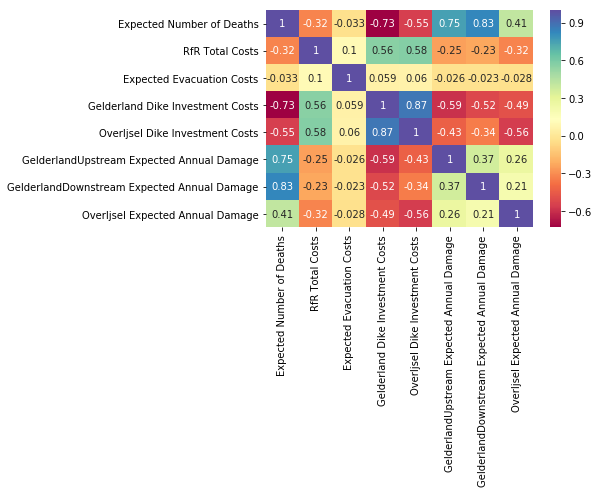

In [12]:
# Make an initial heatmap to see which outcomes should be put into the PairGrids
sns.heatmap(pd.DataFrame(outcomes).corr(),annot=True, cmap= "Spectral")

#### Pairgrid

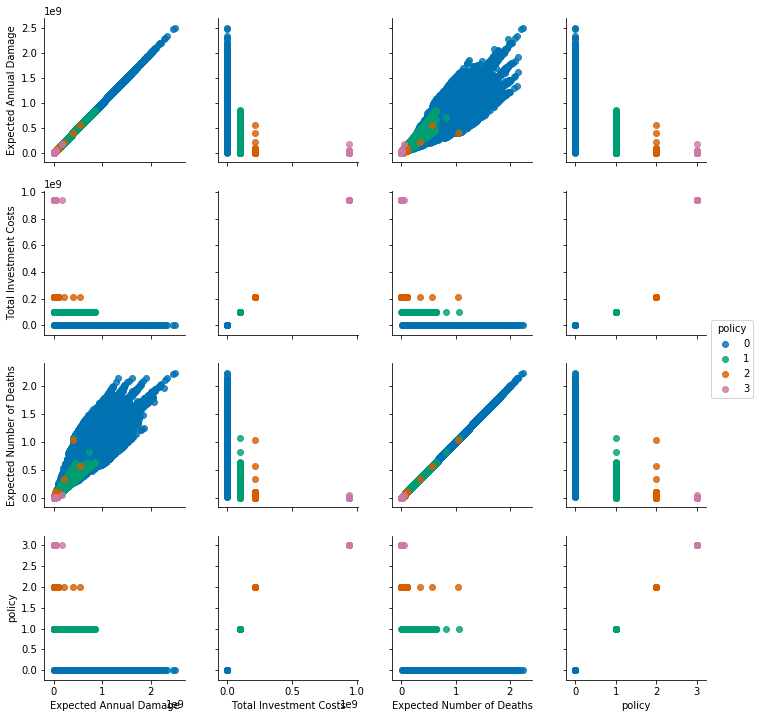

In [50]:
# # Show all
# # Good only for 3 obj PF
# g = sns.PairGrid(data, hue='policy', palette='colorblind')
# g.map(plt.scatter, alpha=0.8)
# g.add_legend()

In [13]:
# In case of 8 obj PF

In [14]:
data.loc[:10000,'policy'] = 'Do nothing'
data.loc[10000:20000,'policy'] = 'Selfish'
data.loc[20000:30000,'policy'] = 'Moderate'
data.loc[30000:,'policy'] = 'Do everything'

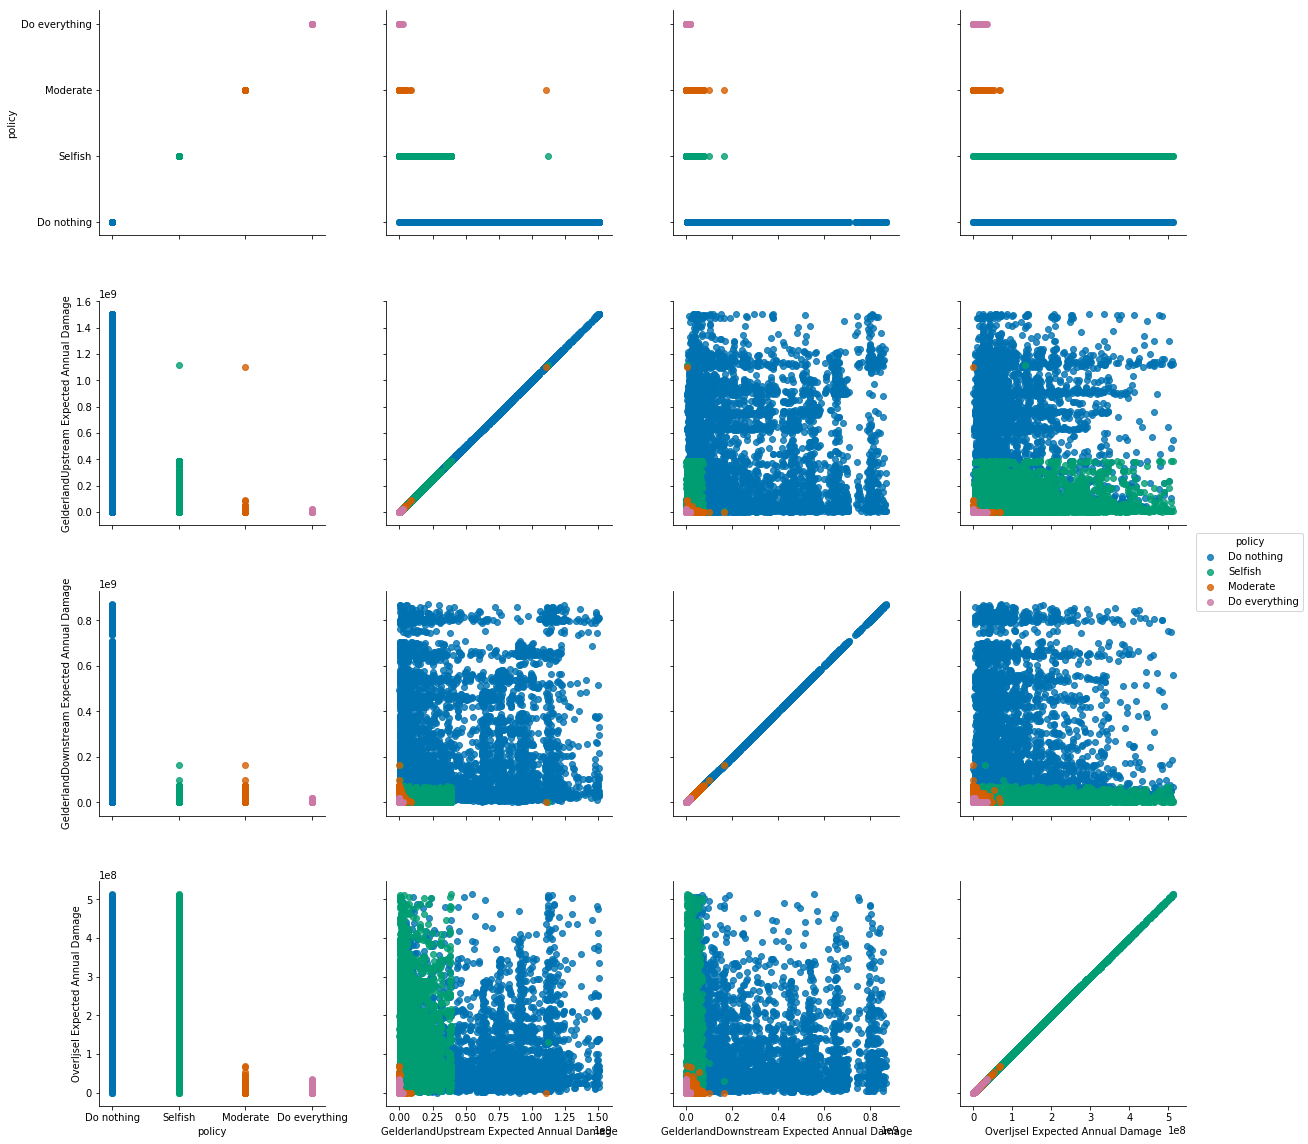

In [15]:
# Show separately 
# Select interesting ones
g = sns.PairGrid(data, hue='policy', palette='colorblind', vars= ['policy', 
                                                                  'GelderlandUpstream Expected Annual Damage', 
                                                                 'GelderlandDownstream Expected Annual Damage', 
                                                                 'OverIjsel Expected Annual Damage'], size = 4)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

#### Tsplot

In [16]:
# Preprocess results one more time
experiments, outcomes = results
n_policies = 4
n_scenarios = len(experiments) / n_policies

policies = np.empty([len(experiments), 1])
k = 0
l = n_scenarios
for i in range (len(experiments)) : 
    policies[i] = k
    if (i == l - 1) : 
        k = k + 1
        l = l + n_scenarios
policies = policies.astype(int)

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

C:\Users\Mikhail\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Mikhail\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Mikhail\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Mikhail\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


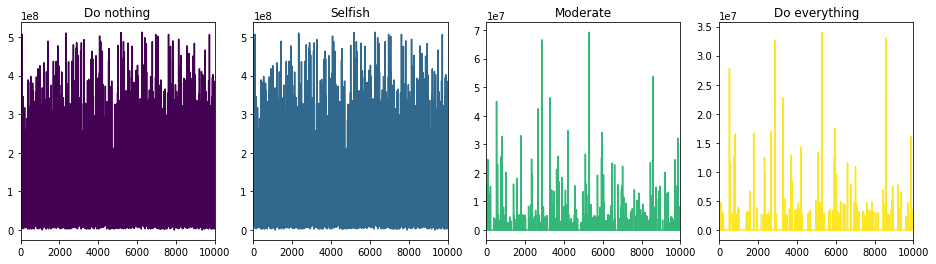

In [17]:
# 8 obj PF only
# Show ranges in OverIjsel Expected Annual Damage
fig, axs = plt.subplots(figsize=[16,4],ncols=4)
colors = iter(cm.viridis(np.linspace(0, 1, 4)))
l = ['Do nothing', 'Selfish', 'Moderate', 'Do everything']
for i in range(0, n_policies) : 
    sns.tsplot(data=data[data.policy == int(i)]['OverIjsel Expected Annual Damage'].reset_index(drop=True), ax=axs[i], legend=True, color=next(colors)).set_title(l[i])
    # plt.xlabel('experiments')
    # plt.ylabel('values')

C:\Users\Mikhail\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Mikhail\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Mikhail\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Mikhail\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


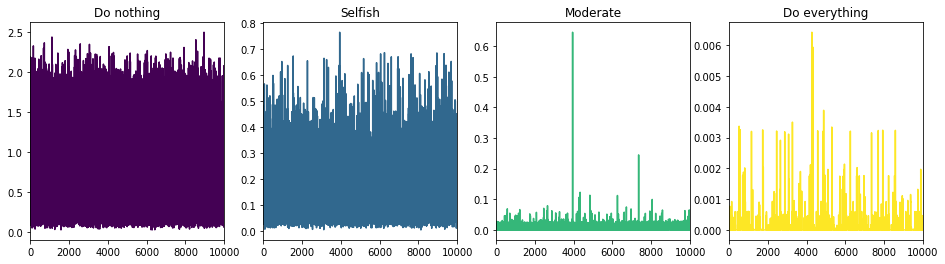

In [18]:
# Show ranges in Expected Number of Deaths
fig, axs = plt.subplots(figsize=[16,4],ncols=4)
colors = iter(cm.viridis(np.linspace(0, 1, 4)))
l = ['Do nothing', 'Selfish', 'Moderate', 'Do everything']
for i in range(0, n_policies) : 
    sns.tsplot(data=data[data.policy == int(i)]['Expected Number of Deaths'].reset_index(drop=True), ax=axs[i], legend=True, color=next(colors)).set_title(l[i])
    # plt.xlabel('experiments')
    # plt.ylabel('values')